# Fashion MNIST 분류 모델

## 데이터 불러오기

In [9]:
# 라이브러리 import
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# FashionMNIST 데이터 불러오기
fashion_mnist = keras.datasets.fashion_mnist  # fashion_mnist 데이터 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # train set과 test set을 분리해서 로드
is_normalized = False  # 0부터 255 사이의 값을 255로 나누어 0과 1 사이의 값으로 정규화 했는지 확인 위해

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 데이터 구성 확인

In [3]:
# Train set 이미지 개수
print(train_images.shape[0])

60000


In [4]:
# Test set 이미지 개수
print(test_images.shape[0])

10000


In [5]:
# 이미지 크기
print(train_images.shape[1], train_images.shape[2])  # 28 X 28

28 28


In [6]:
# Train label 저장 형태
print(str(train_labels[:]))

[9 0 0 ... 3 0 5]


In [7]:
# 이미지 값 예시
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

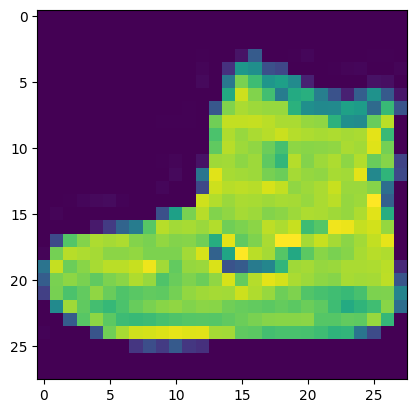

In [11]:
plt.figure()  # 그림 입력 준비
plt.imshow(train_images[0])  # Train set의 첫 번째 이미지
plt.colorbar  # 컬러바
plt.show()  # 이미지 출력

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

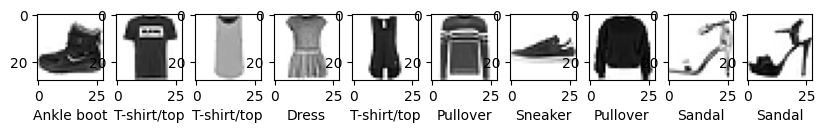

In [35]:
# Train set의 첫 10장의 이미지와 각각의 카테고리 확인
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))  # 그림 크기 10 X 10
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.grid(False)  # 격자 off
  plt.imshow(train_images[i], cmap=plt.cm.binary)  # cmap(컬러맵)은 binary(회색조)
  plt.xlabel(class_names[train_labels[i]])
plt.show()  # 이미지 출력

## 정규화

In [15]:
if not is_normalized:  # is_normalized 변수가 False라면
  train_images = train_images / 255.0  # 0 ~ 255 -> 0 ~ 1
  test_images = test_images / 255.0  # 0 ~ 255 -> 0 ~ 1

  is_normalized = True

## 모델 생성

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # (28, 28) Flatten -> 784
     keras.layers.Dense(512, activation=tf.nn.tanh), # 784 -> 512, 활성함수는 tanh, 은닉층
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512, 활성함수는 tanh, 은닉층
    keras.layers.Dense(10, activation=tf.nn.softmax)  # 클래스 개수인 10개로 변환, softmax 함수를 통해 확률값 반환
])

## 모델 훈련

In [20]:
model.compile(optimizer='adam',  # adam optimozer 사용
              loss='sparse_categorical_crossentropy',  # sparse_categorical_crossentropy 손실함수 사용
              metrics=['accuracy'])  # accuracy로 평가

In [21]:
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels)  # Test set
                    )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7856 - loss: 0.6001 - val_accuracy: 0.8520 - val_loss: 0.4203
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8598 - loss: 0.3807 - val_accuracy: 0.8430 - val_loss: 0.4287
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8699 - loss: 0.3431 - val_accuracy: 0.8642 - val_loss: 0.3758
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8790 - loss: 0.3248 - val_accuracy: 0.8542 - val_loss: 0.4110
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.8840 - loss: 0.3105 - val_accuracy: 0.8663 - val_loss: 0.3686
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8873 - loss: 0.3057 - val_accuracy: 0.8638 - val_loss: 0.3807
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8925 - loss: 0.2906 - val_accuracy: 0.8641 - val_loss: 0.3827
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8950 -

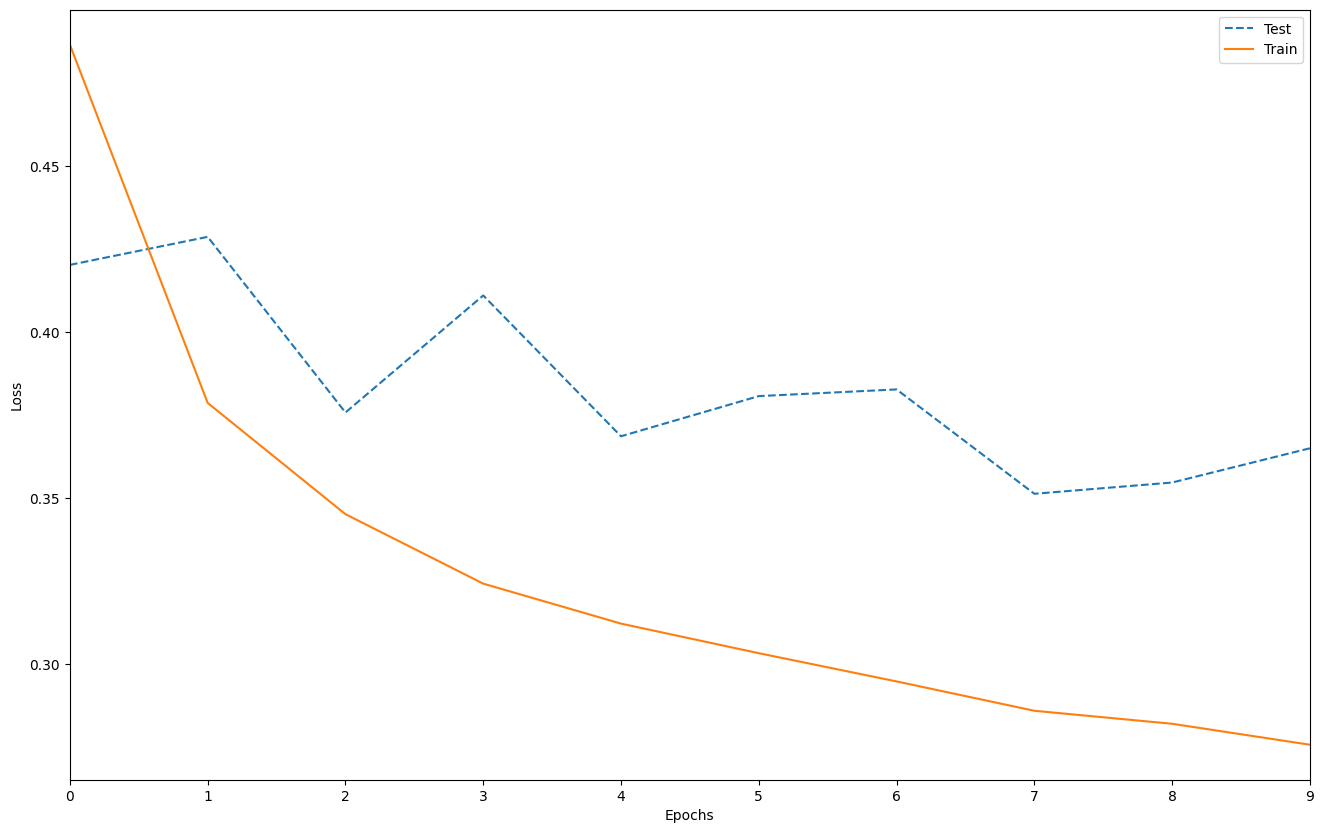

In [25]:
def plot_loss(history):
  plt.figure(figsize=(16, 10))  # 그림 크기 = (16, 10)
  plt.plot(history.epoch, history.history['val_loss'], '--', label='Test')  # validation loss를 에폭마다 점선으로 표시
  plt.plot(history.epoch, history.history['loss'], label='Train')  # training loss를 에폭마다 실선으로 표시

  plt.xlabel('Epochs')  # x축
  plt.ylabel('Loss')  # y축
  plt.legend()  # 범례 표시

  plt.xlim([0, max(history.epoch)])  # x축은 0부터 epoch 최댓값까지

plot_loss(history)  # history 출력

## 모델 성능 평가

In [26]:
def eval_model(model):
  test_loss, test_acc = model.evaluate(test_images, test_labels)  # Test set으로 모델 평가
  print('Test accuracy:', test_acc)  # 정확도 출력

eval_model(model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8715 - loss: 0.3696
Test accuracy: 0.8693000078201294


In [30]:
# 활성화 함수 ReLU로 변경, Dropout 추가
drop_rate = 0.3

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) -> 784 Flatten
    keras.layers.Dense(512, activation=tf.nn.relu), # 784 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dropout(rate=drop_rate), # 설정해둔 확률로 dropout
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])

In [31]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy 손실함수 사용
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 이미지 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3870 - loss: 1.7053 - val_accuracy: 0.6574 - val_loss: 0.8548
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6806 - loss: 0.8358 - val_accuracy: 0.7415 - val_loss: 0.6982
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7304 - loss: 0.6761 - val_accuracy: 0.7624 - val_loss: 0.6265
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7852 - loss: 0.6029 - val_accuracy: 0.7627 - val_loss: 0.6539
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7969 - loss: 0.5528 - val_accuracy: 0.7815 - val_loss: 0.5940
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8202 - loss: 0.4915 - val_accuracy: 0.7851 - val_loss: 0.6120
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8061 - loss: 0.5460 - val_accuracy: 0.7707 - val_loss: 0.6645
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8087 - loss: 0.5250 - val_accuracy: 0.7990 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8221 - loss: 0.6474
Test accuracy: 0.8172000050544739


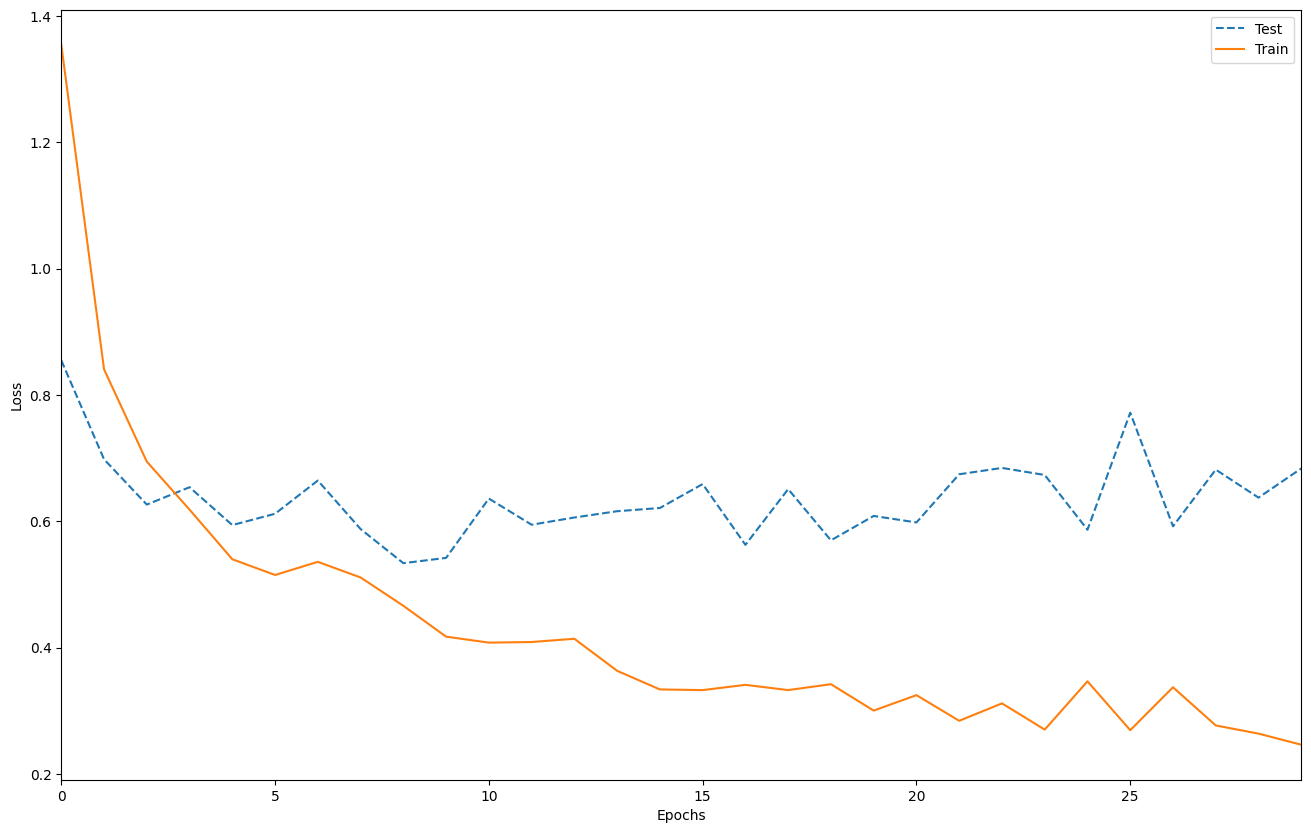

In [32]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가

In [34]:
def eval_model(model):
  test_loss, test_acc = model.evaluate(test_images, test_labels) # test셋으로 모델 평가
  print('Test accuracy:', test_acc) # 정확도 출력

eval_model(model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8221 - loss: 0.6474
Test accuracy: 0.8172000050544739
